In [16]:
# importing the module
import ast
import pandas as pd

# Opening JSON file
with open('corona_tweets_02_data.txt', encoding='utf-8') as json_file:
    tweets = []
    for line in json_file:
        tweets.append(ast.literal_eval(line))

In [17]:
for i in range(3):
    print(tweets[i])
    print("\n")

{'possibly_sensitive': False, 'entities': {'mentions': [{'start': 3, 'end': 15, 'username': 'Chloelhaley'}]}, 'text': 'RT @Chloelhaley: Can everyone just stay at home please so that corona fucks off quickly and then we can carry on and enjoy our summer, fest…', 'public_metrics': {'retweet_count': 24370, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}, 'id': '1240862157228703744', 'context_annotations': [{'domain': {'id': '123', 'name': 'Ongoing News Story', 'description': "Ongoing News Stories like 'Brexit'"}, 'entity': {'id': '1220701888179359745', 'name': 'COVID-19'}}], 'lang': 'en', 'author_id': '622247914', 'source': 'Twitter for iPhone', 'referenced_tweets': [{'type': 'retweeted', 'id': '1240274922657677313'}], 'created_at': '2020-03-20T04:46:07.000Z'}


{'possibly_sensitive': False, 'text': 'Follow my sister on SoundCloud she about to drop sum hot shit 🔥 before we all die from corona https://t.co/1lKfsxKQWt', 'public_metrics': {'retweet_count': 0, 'reply_count': 0, 'like_cou

In [18]:
tweet_dataframe = pd.DataFrame(tweets, columns = ['possibly_sensitive', 'entities', 'text', 'public_metrics', 'id', 'context_annotations', 'lang', 'in_reply_to_user_id', 'author_id', 'source', 'referenced_tweets', 'created_at']) 

In [19]:
print(tweet_dataframe.head())

   possibly_sensitive                                           entities  \
0               False  {'mentions': [{'start': 3, 'end': 15, 'usernam...   
1               False  {'annotations': [{'start': 20, 'end': 29, 'pro...   
2               False  {'mentions': [{'start': 3, 'end': 15, 'usernam...   
3               False  {'mentions': [{'start': 3, 'end': 15, 'usernam...   
4               False  {'mentions': [{'start': 3, 'end': 15, 'usernam...   

                                                text  \
0  RT @Chloelhaley: Can everyone just stay at hom...   
1  Follow my sister on SoundCloud she about to dr...   
2  RT @toriarenee_: This is for CORONA  you big f...   
3  RT @Chloelhaley: Can everyone just stay at hom...   
4  RT @GabbyMarieS: ok picture this:\n\nthe coron...   

                                      public_metrics                   id  \
0  {'retweet_count': 24370, 'reply_count': 0, 'li...  1240862157228703744   
1  {'retweet_count': 0, 'reply_count': 0, 'like_c...

In [20]:
print(tweet_dataframe.dtypes)

possibly_sensitive       bool
entities               object
text                   object
public_metrics         object
id                     object
context_annotations    object
lang                   object
in_reply_to_user_id    object
author_id              object
source                 object
referenced_tweets      object
created_at             object
dtype: object


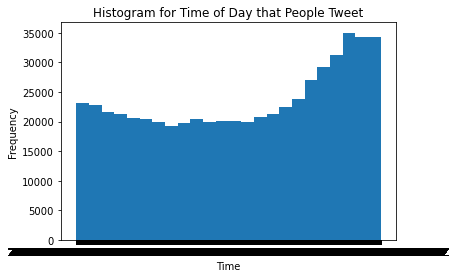

In [21]:
# This take a super long time to run. 
import matplotlib.pyplot as plt
plt.hist(tweet_dataframe.created_at, bins = 24)
plt.title("Histogram for Time of Day that People Tweet")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Open users_reduced
with open('users_reduced.txt', encoding='utf-8') as user_file:
    users = []
    for line in user_file:
        users.append(ast.literal_eval(line))
    for i in range(3):
        print(users[i])
        print('\n')

{'id': '261109071', 'protected': False, 'url': '', 'public_metrics': {'followers_count': 263, 'following_count': 354, 'tweet_count': 10381, 'listed_count': 0}, 'name': 'RIZWAN AHMAD', 'created_at': '2011-03-05T07:30:18.000Z', 'username': 'RizwanAhmadd', 'location': 'University of Hyderabad, India', 'description': 'Doctoral Research Fellow. Interested in Indian Food and Cuisine, Mughal food culture, Mughal India, Amalgamation of cultures in India.', 'profile_image_url': 'https://pbs.twimg.com/profile_images/1251783732249325572/FvLPyQZG_normal.jpg', 'verified': False}


{'id': '1187739234863591425', 'protected': False, 'entities': {'url': {'urls': [{'start': 0, 'end': 23, 'url': 'https://t.co/qTAdv0qE77', 'expanded_url': 'https://telangana.gov.in/legislative-assembly', 'display_url': 'telangana.gov.in/legislative-as…'}]}}, 'url': 'https://t.co/qTAdv0qE77', 'public_metrics': {'followers_count': 43622, 'following_count': 1007, 'tweet_count': 1200, 'listed_count': 14}, 'name': 'Danasari Ana

In [23]:
users_df = pd.DataFrame(users, columns = ['id', 'protected', 'url', 'public_metrics', 'name', 'created_at', 'username', 'location', 'description', 'profile_image_url', 'verified']) 
print(users_df.head())

                    id  protected                      url  \
0            261109071      False                            
1  1187739234863591425      False  https://t.co/qTAdv0qE77   
2            210766152      False                            
3           1633141729      False  https://t.co/b4RW7NO7s0   
4   706021655659679744      False                            

                                      public_metrics  \
0  {'followers_count': 263, 'following_count': 35...   
1  {'followers_count': 43622, 'following_count': ...   
2  {'followers_count': 2542, 'following_count': 4...   
3  {'followers_count': 78893, 'following_count': ...   
4  {'followers_count': 222, 'following_count': 19...   

                           name                created_at      username  \
0                  RIZWAN AHMAD  2011-03-05T07:30:18.000Z  RizwanAhmadd   
1  Danasari Anasuya (Seethakka)  2019-10-25T14:34:53.000Z  seethakkaMLA   
2                     LIVEEDGES  2010-11-01T10:16:18.000Z     Liv

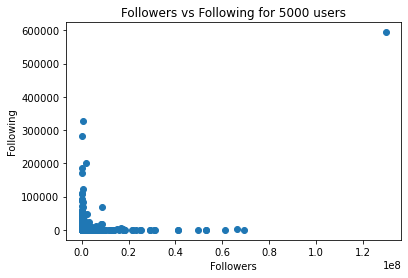

In [24]:
# Followers vs Following
import numpy as np
num_users = len(users_df.index)
followers = np.zeros(shape=(num_users,1))
following = np.zeros(shape=(num_users,1))
for row in range(num_users):
    followers[row] = users_df.public_metrics[row]['followers_count']
    following[row] = users_df.public_metrics[row]['following_count']
plt.scatter(followers, following)
plt.title("Followers vs Following for " + str(num_users) + " users")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

In [25]:
# Users file is way too big. Tweets contain author id, a number, and mention is string. We need a hashtable of author_id and username to make this work
# I am officially using random data that I will make up by myself (temporarily...).

tweets_in_graph = 20
#edges = np.empty((0))
edges = []

with open('networkx_test.txt', encoding='utf-8') as mini_file:
    mini_tweets = []
    for line in mini_file:
        mini_tweets.append(ast.literal_eval(line))

minitweets_df = pd.DataFrame(mini_tweets, columns = ['possibly_sensitive', 'entities', 'text', 'public_metrics', 'id', 'context_annotations', 'lang', 'in_reply_to_user_id', 'author_id', 'source', 'referenced_tweets', 'created_at']) 

#minitweets_df.author_id
#print(type(minitweets_df.entities[0]))
#print(minitweets_df.loc[0])
#minitweets_df.entities[0]['mentions']

for row in range(20):
    if minitweets_df.entities[row] == minitweets_df.entities[row] and 'mentions' in minitweets_df.entities[row]:
        for mention in minitweets_df.entities[row]['mentions']:
            edges.append((minitweets_df.author_id[row], mention['username']))
print(edges)

[('toriarenee_', 'Chloelhaley'), ('MLKChefLean', 'toriarenee_'), ('MLKChefLean', 'Chloelhaley'), ('kifayat4pak', 'GabbyMarieS'), ('NYCMayor', 'MLKChefLean'), ('kifayat4pak', 'goodbeanaltalt'), ('SabinaLamba', 'kifayat4pak'), ('SabinaLamba', 'Jhagra'), ('SabinaLamba', 'NYCMayor'), ('Chloelhaley', 'SabinaLamba'), ('Chloelhaley', 'narendramodi'), ('SabinaLamba', 'DillonFrancis'), ('GabbyMarieS', 'Biancaixvi'), ('Biancaixvi', 'shegonsuck'), ('DillonFrancis', 'T_Rova_Official'), ('Noone', 'MakedaMorrison')]


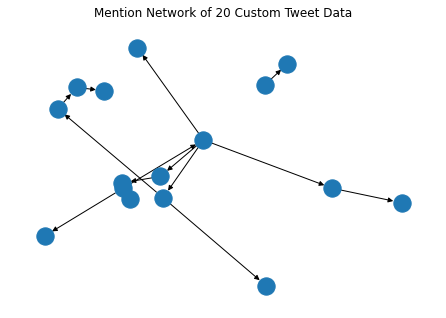

In [26]:
import networkx as nx
G = nx.DiGraph(edges)
labeled = False 
nx.draw(G, with_labels=labeled)
plt.title('Mention Network of 20 Custom Tweet Data')
plt.show()

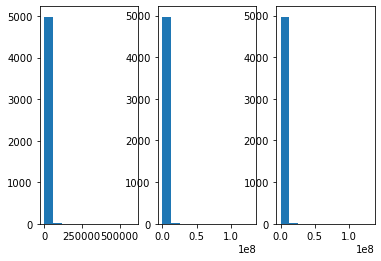

In [27]:
# imagine graph where edge from node 1 to node 2 means node1 follows node2 
out_degree = following
in_degree = followers
total_degree = out_degree + in_degree

plt.subplot(1, 3, 1)
plt.hist(out_degree)

plt.subplot(1, 3, 2)
plt.hist(in_degree)

plt.subplot(1, 3, 3)
plt.hist(total_degree)

plt.show()

In [28]:
print(users_df.location.iloc[:20])

0     University of Hyderabad, India
1                   Hyderabad, India
2           United States of America
3                        Chicago, IL
4                                NaN
5                               Inde
6                                NaN
7         Johannesburg, South Africa
8                       Portland, OR
9                               Ohio
10                 San Francisco, CA
11                               NaN
12                               NaN
13                    Washington, DC
14                       Atlanta, GA
15                            Philly
16                  Allahabad, India
17                               NaN
18     she/her | 17 | read carrd byf
19                              18+ 
Name: location, dtype: object


In [29]:
# This is completely useless. It is just for the sake of making a chloropeth.
# Location data seems messed up
# What we do: count number of users in each country
import chart_studio.plotly as py 
import plotly.graph_objs as go #importing graphical objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = dict(
        type = 'choropleth',
        locations = users_df['location'],
        z = users_df['id'],
        colorbar = {'title' : 'ghj - World Wide'},
      )
layout = dict(
    title = 'hjkg',
    geo = dict(
            showframe = False,
            projection = {'type':'natural earth'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)